# CSS324 Homework Assignment

CIFAR10 is a small image classification dataset. Its objective is to classification an 32x32 color image into 10 classes.

See https://www.cs.toronto.edu/~kriz/cifar.html and https://keras.io/api/datasets/cifar10/ for more details.

### Members
6222780379 Paphana Yiwsiw (Section 3)

6222771634 Minsu Yun (Section 2)

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
# Plot a training example
# x = x_train[19, :, :, :]
# y = y_train[19][0]
# plt.imshow(x)
# print(y)
# 0 -> airplane / 1 -> automobile / 2 -> bird / 3 -> cat / 4 -> deer
# 5 -> dog / 6 -> frog / 7 -> horse / 8 -> ship / 9 -> truck

## Question 1

Construct a deep neural network containing three hidden layer to classify images in the CIFAR10 dataset. You can choose the numbers of hidden nodes in three layers, appropriate activation functions, regularizers. Use 20% of the training set to validate the model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
# Your implementation for Question 1
tf.random.set_seed(11)
# Preprocess
x_train2 = x_train / 255.0
x_test2 = x_test / 255.0
y_train2 = tf.keras.utils.to_categorical(y_train)
y_test2 = tf.keras.utils.to_categorical(y_test)

In [ ]:
# Define a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

# complie model
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
model.summary()

# set a checkpoint callback & train model
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = '/tmp/checkpoint',save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
history = model.fit(x_train2,y_train2,epochs=200,batch_size=1024,shuffle=True,validation_split=0.2,callbacks=[model_checkpoint_callback])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 batch_normalization (BatchN  (None, 3072)             12288     
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               393344    
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 128)               0

{'loss': [2.4112794399261475, 2.1312310695648193, 2.031327962875366, 1.9739890098571777, 1.9211370944976807, 1.8796297311782837, 1.8470510244369507, 1.824052333831787, 1.7998156547546387, 1.7811973094940186, 1.7640777826309204, 1.7484078407287598, 1.732393503189087, 1.718002200126648, 1.7015628814697266, 1.6898163557052612, 1.6750880479812622, 1.6798224449157715, 1.6600641012191772, 1.6476765871047974, 1.6362560987472534, 1.6300286054611206, 1.6261723041534424, 1.6167726516723633, 1.5996986627578735, 1.5948455333709717, 1.5994102954864502, 1.5805453062057495, 1.5785157680511475, 1.5695769786834717, 1.5657298564910889, 1.566394567489624, 1.5588154792785645, 1.5516270399093628, 1.5426081418991089, 1.543104648590088, 1.5416035652160645, 1.5360909700393677, 1.5311859846115112, 1.5294404029846191, 1.5243853330612183, 1.5189498662948608, 1.518293023109436, 1.5103123188018799, 1.5103343725204468, 1.5163122415542603, 1.5086883306503296, 1.50252103805542, 1.4921183586120605, 1.49857759475708, 1

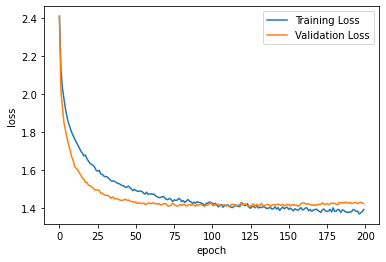

In [ ]:
# Plot the training loss and validation loss
print(history.history)
model.load_weights('/tmp/checkpoint')
print(model.evaluate(x_train2,y_train2,verbose=0))
print(model.evaluate(x_test2,y_test2,verbose=0))
loss_train = np.array(history.history['loss'])
loss_test = np.array(history.history['val_loss'])
x = np.arange(0,loss_train.shape[0])
plt.plot(x,loss_train,label='Training Loss')
plt.plot(x,loss_test,label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

## Question 2

Construct a convolutional neural network using your own structure. Try to maximize the prediction accuracy of your model.

After the training process, print the training, validation, and test accuracies, as well as plot the training loss and validation loss.

In [ ]:
# Your implementation for Question 2
x_train3 = x_train/255.0
x_test3 = x_test/255.0
y_train3 = tf.keras.utils.to_categorical(y_train)
y_test3 = tf.keras.utils.to_categorical(y_test)

x_train3 = x_train3.reshape((-1,32,32,3))
x_test3 = x_test3.reshape((-1,32,32,3))
tf.random.set_seed(11)

#Define a model
model2 = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(32,32,3)),
        tf.keras.layers.Conv2D(128,(3,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D((3,3),strides=(2,2)),
        tf.keras.layers.Conv2D(256,(3,3)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.ReLU(),
        tf.keras.layers.MaxPooling2D((3,3),strides=(2,2)),
        tf.keras.layers.SpatialDropout2D(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512,activation='relu',kernel_regularizer=tf.keras.regularizers.l2(1e-4)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(10,activation='softmax')
])

# complie model
model2.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])
model2.summary()

# set a checkpoint callback & train model
model2_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath = '/tmp/checkpoint',save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)
history2 = model2.fit(x_train3,y_train3,epochs=200,batch_size=1024,shuffle=True,validation_split=0.2,callbacks=[model_checkpoint_callback])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 batch_normalization_7 (Batc  (None, 30, 30, 128)      512       
 hNormalization)                                                 
                                                                 
 re_lu_2 (ReLU)              (None, 30, 30, 128)       0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 256)       295168    
                                                                 
 batch_normalization_8 (Batc  (None, 12, 12, 256)     

{'loss': [2.0189852714538574, 1.4957658052444458, 1.3423107862472534, 1.2622488737106323, 1.1993902921676636, 1.1354143619537354, 1.1041409969329834, 1.062524676322937, 1.0222015380859375, 1.0116719007492065, 0.9750111103057861, 0.9557264447212219, 0.9531852602958679, 0.9167073965072632, 0.8970794677734375, 0.882149338722229, 0.866867184638977, 0.8557206988334656, 0.832396388053894, 0.8039259910583496, 0.8158173561096191, 0.8197792768478394, 0.7972015142440796, 0.7718296051025391, 0.7427088618278503, 0.7440065741539001, 0.7267738580703735, 0.729416012763977, 0.7163625955581665, 0.7144774794578552, 0.6960183382034302, 0.6836366653442383, 0.6736224293708801, 0.667607843875885, 0.6702982187271118, 0.6507239937782288, 0.6523803472518921, 0.6353419423103333, 0.6304196715354919, 0.6213194131851196, 0.6338307857513428, 0.5943188667297363, 0.578580379486084, 0.5936596393585205, 0.5751136541366577, 0.5656831860542297, 0.5567961931228638, 0.5671820044517517, 0.5503221154212952, 0.552599966526031

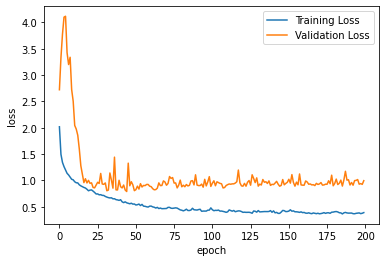

In [ ]:
# Plot the training loss and validation loss
print(history2.history)
model2.load_weights('/tmp/checkpoint')
print(model2.evaluate(x_train3,y_train3,verbose=0))
print(model2.evaluate(x_test3,y_test3,verbose=0))
loss_train2 = np.array(history2.history['loss'])
loss_test2 = np.array(history2.history['val_loss'])
x2 = np.arange(0,loss_train2.shape[0])
plt.plot(x2,loss_train2,label='Training Loss')
plt.plot(x2,loss_test2,label='Validation Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()